In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
train,test = mnist.load_data() #Loading handwritten digits dataset with 28x28 images (labelled data)

In [3]:
X_train, Y_train = train #Splitting data into images and corresponding labels

In [4]:
X_test, Y_test = test

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [8]:
Y_test.shape

(10000,)

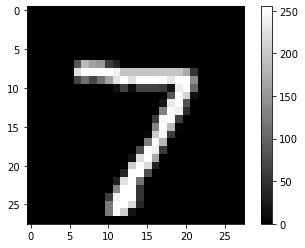

In [9]:
import matplotlib.pyplot as plt #Displaying the image using plotting library
plt.imshow(X_test[0],cmap='gray')
plt.colorbar()
plt.show()

In [10]:
#Normalizing data to bring in range 0 to 1 from 0 to 255
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [13]:
X_train.shape #Flattened the images from 28x28 to 784 to feed to neural network neurons

(60000, 784)

In [14]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
model = Sequential() #Making a feed-forward artificial neural network with sequential layers

In [18]:
#Adding layers and activations
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Categorical crossentropy is used to define error for multiple classes (0 to 9 in this case)
#Adam optimizer uses a combination of RMSProp and Gradient Descent Optimization technique
#We are judging the model on its accuracy

In [20]:
#Training the model using the training data
model.fit(X_train,Y_train,batch_size=1000,epochs=40,validation_split=0.2)
#All the above parameters in fit function are hyperparameters, change them and experiment with them to see what different results can be found

Epoch 1/40
48/48 [==============================] - 1s 22ms/step - loss: 1.1930 - accuracy: 0.6294 - val_loss: 0.4704 - val_accuracy: 0.8708
Epoch 2/40
48/48 [==============================] - 0s 9ms/step - loss: 0.3669 - accuracy: 0.8996 - val_loss: 0.2676 - val_accuracy: 0.9277
Epoch 3/40
48/48 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.9310 - val_loss: 0.2050 - val_accuracy: 0.9437
Epoch 4/40
48/48 [==============================] - 0s 8ms/step - loss: 0.1941 - accuracy: 0.9452 - val_loss: 0.1765 - val_accuracy: 0.9517
Epoch 5/40
48/48 [==============================] - 0s 8ms/step - loss: 0.1596 - accuracy: 0.9545 - val_loss: 0.1513 - val_accuracy: 0.9568
Epoch 6/40
48/48 [==============================] - 0s 8ms/step - loss: 0.1361 - accuracy: 0.9606 - val_loss: 0.1429 - val_accuracy: 0.9582
Epoch 7/40
48/48 [==============================] - 0s 8ms/step - loss: 0.1184 - accuracy: 0.9662 - val_loss: 0.1368 - val_accuracy: 0.9605
Epoch 8/40
48/48 [=

In [21]:
#calculating test accuracy
import numpy as np
total = len(X_test)
Y_pred = model.predict(X_test)
corr=0
for i in range(len(X_test)):
    if np.argmax(Y_pred[i]) == np.argmax(Y_test[i]):
        corr+=1

In [22]:
test_accuracy = corr/total

In [23]:
test_accuracy

0.9734

In [24]:
#working of argmax
np.argmax(Y_pred[0])

7

In [25]:
np.argmax(Y_test[0])

7